In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/GitHub/NLP-project-/NLP/Dataset/Instagram_profile_20220220_172954.success.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6,9,14,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,account,caption,profile_name,profile_image_link,biography,id,business_email,external_url,following,likes,media_type,posts_count,followers,is_verified,datetime,image_url,url,comments,thumbnails,location
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,🌎🧳🔥🥇🎨🍷☕\n 🇻🇪 🇨🇴\nEMPRESARIO SOÑADOR\...,3.654414e+09,NaN,NaN,1105.0,NaN,NaN,515.0,1244.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,Consultant Plastic and Reconstructive Surgeon,1.366797e+09,NaN,http://www.psauk.org/,57.0,NaN,NaN,8.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
from functools import reduce

In [6]:
%run /content/drive/MyDrive/GitHub/NLP-project-/NLP/Dataset/preprocessing.ipynb

     |████████████████████████████████| 55 kB 3.0 MB/s 
     |████████████████████████████████| 1.3 MB 84.1 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 65 kB 3.9 MB/s 
     |████████████████████████████████| 53 kB 2.5 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=84c00877c4f7a5bcb4995f431467ac33c07a48b139e15c276721ef81e22ab870
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
PREPROCESSING_PIPELINE = [translation,
                          clean_mention,
                          clean_hashtags,
                          lower,
                          replace_special_characters,
                          replace_br,
                          filter_out_uncommon_symbols,
                          replace_by_underscore,
                          remove_stopwords,
                          strip_text,
                          remove_emoji]

#PREPROCESSING_PIPELINE1 = [remove_brackets_from_list]


# Anchor method

def text_prepare(text: str,filter_methods = None) -> str:
    """
    Applies a list of pre-processing functions in sequence (reduce).
    Note that the order is important here!
    """
    filter_methods = filter_methods if filter_methods is not None else PREPROCESSING_PIPELINE
    return text



# def text_prepare1(text: str,filter_methods = None) -> str:
#     """
#     Applies a list of pre-processing functions in sequence (reduce).
#     Note that the order is important here!
#     """

#     filter_methods = filter_methods if filter_methods is not None else PREPROCESSING_PIPELINE1

#     return reduce(lambda txt, f: f(txt), filter_methods, text)


# L=['hashtags','emoji_text','mentions']
# A=['caption','emoji_text']

# for i in L:
#   df[i] = df[i].apply(lambda txt: text_prepare1(str(txt)[1:-1]))

# for i in A:
#   df[i]=df[i].apply(lambda txt: text_prepare(str(txt)))

#df['caption'] = df['caption'].apply(lambda txt: text_prepare1(str(txt)[1:-1]))


In [16]:
df['caption']=df['caption'].apply(lambda txt: text_prepare(str(txt)))


In [ ]:
df['caption']

#df_industry

In [19]:
df_industry=pd.read_csv('/content/drive/MyDrive/GitHub/NLP-project-/NLP/Dataset/df_industry.csv', encoding='latin-1')

In [20]:
df_industry.head()

,ACCOUNT,INDUSTRY,SUB-CATEGORY,REGION
0,deepaestheticss,cosmetics,beauty clinic,UK
1,jossyaesthetics,cosmetics,beauty clinic,UK
2,kanpailondon,hospitality,brewery,UK
3,drjb.aesthetics,cosmetics,beauty clinic,UK
4,nataliefaccini.aesthetics,cosmetics,beauty clinic,UK


In [21]:
df_industry=df_industry.rename(columns={'ACCOUNT':'account'})

In [22]:
mergedStuff=pd.merge(df, df_industry, on=['account'], how='inner')

In [23]:
df_cosmetics=mergedStuff[mergedStuff['INDUSTRY']=='cosmetics']
#df_cosmetics.to_csv('df_cosmetics.csv')
df_hospitality=mergedStuff[mergedStuff['INDUSTRY']=='hospitality']
#df_hospitality.to_csv('df_hospitality.csv')

df_fit_sport=mergedStuff[mergedStuff['INDUSTRY']=='fitness']
df_real_estate=mergedStuff[mergedStuff['INDUSTRY']=='real estate']
df_retail=mergedStuff[mergedStuff['INDUSTRY']=='retail']
df_sport_recreation=mergedStuff[mergedStuff['INDUSTRY']=='sport & recreation']
df_fashion=mergedStuff[mergedStuff['INDUSTRY']=='fashion']
df_childcare=mergedStuff[mergedStuff['INDUSTRY']=='childcare']

#df_cosmetics

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X=vectorizer.fit_transform(df_cosmetics['caption'])

In [27]:
df_cosmetics['SUB-CATEGORY'].unique()

array(['beauty clinic', 'beauty products', 'dental practice'],
      dtype=object)

In [28]:
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

In [29]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [30]:
# assign clusters and pca vectors to our dataframe 
df_cosmetics['cluster'] = clusters
df_cosmetics['x0'] = x0
df_cosmetics['x1'] = x1

#cluster_map_cosm = {0:'beauty clinic',1: 'beauty products',2: 'dental practice'}
#df_cosmetics['cluster'] = df_cosmetics['cluster'].map(cluster_map_cosm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [31]:
import numpy as np
def get_top_keywords(n_terms, df):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10, df_cosmetics)


Cluster 0
extent,external,externally,extra,extracellular,extracorporeal,extract,extracting,𝟯𝟲𝟬,nan

Cluster 1
is,your,our,for,you,in,of,and,to,the

Cluster 2
and,to,the,plasticsurgeon,surgery,liposuction,breastaugmentation,plasticsurgery,cosmeticsurgery,breast


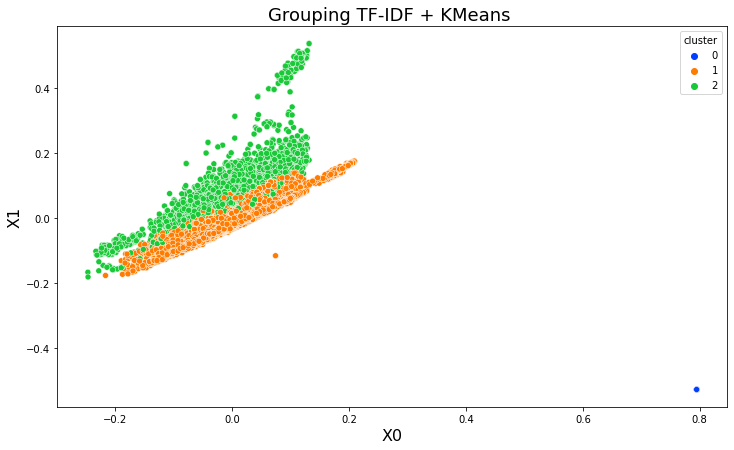

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
# set image size
plt.figure(figsize=(12, 7))
# set title
plt.title("Grouping TF-IDF + KMeans ", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
#  create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df_cosmetics, x='x0', y='x1', hue='cluster', palette="bright")
plt.savefig('cosmetics_clustering.png')

plt.show()

#df_hospitality



In [33]:
df_hospitality['SUB-CATEGORY'].unique()

array(['restaurant', 'hotel', 'pub', 'doughnut shop', 'bakery', 'café',
       'bar & grill', 'bar & kitchen', 'breakfast & brunch restaurant',
       'streetfood market', 'bar', 'pastry shop', 'chocolate shop',
       'brewery', 'wine bar & shop', 'coffee / food shop', 'cocktail bar',
       'ice cream shop', 'serviced apartments', 'pub & restaurant',
       'fast food chain', 'empanadas store / delivery', 'wine bar',
       'dessert shop',
       'restaurants / lifestyle shop / deli / plant nursery',
       'food delivery', 'beer garden'], dtype=object)

In [34]:
df_retail=df_retail.append(df_hospitality.loc[(df_hospitality['SUB-CATEGORY']=='streetfood market') |
                   (df_hospitality['SUB-CATEGORY']=='coffee / food shop')|
                   (df_hospitality['SUB-CATEGORY']=='empanadas store / delivery')|
                   (df_hospitality['SUB-CATEGORY']=='wine bar & shop')|
                   (df_hospitality['SUB-CATEGORY']=='ice cream shop')|
                   (df_hospitality['SUB-CATEGORY']=='bakery')|
                   (df_hospitality['SUB-CATEGORY']=='chocolate shop')|
                   (df_hospitality['SUB-CATEGORY']=='poke shop')|
                   (df_hospitality['SUB-CATEGORY']=='pastry shop')|
                   (df_hospitality['SUB-CATEGORY']=='doughnut shop')|
                   (df_hospitality['SUB-CATEGORY']=='dessert shop')|
                   (df_hospitality['SUB-CATEGORY']=='empanadas shop / delivery')|
                   (df_hospitality['SUB-CATEGORY']=='food delivery')])


In [35]:
df_hospitality=df_hospitality.drop(df_hospitality[(df_hospitality['SUB-CATEGORY']=='streetfood market') |
                   (df_hospitality['SUB-CATEGORY']=='coffee / food shop')|
                   (df_hospitality['SUB-CATEGORY']=='empanadas store / delivery')|
                   (df_hospitality['SUB-CATEGORY']=='wine bar & shop')|
                   (df_hospitality['SUB-CATEGORY']=='ice cream shop')|
                   (df_hospitality['SUB-CATEGORY']=='bakery')|
                   (df_hospitality['SUB-CATEGORY']=='chocolate shop')|
                   (df_hospitality['SUB-CATEGORY']=='poke shop')|
                   (df_hospitality['SUB-CATEGORY']=='pastry shop')|
                   (df_hospitality['SUB-CATEGORY']=='doughnut shop')|
                   (df_hospitality['SUB-CATEGORY']=='dessert shop')|
                   (df_hospitality['SUB-CATEGORY']=='empanadas shop / delivery')|
                   (df_hospitality['SUB-CATEGORY']=='food delivery')].index)

In [36]:
df_hospitality['SUB-CATEGORY']=df_hospitality['SUB-CATEGORY'].replace(['bar', 'café', 'bar & kitchen', 'bar & grill', 'cocktail bar', 'wine bar', 'pub', 'brewery'], 'bar')
df_hospitality['SUB-CATEGORY']=df_hospitality['SUB-CATEGORY'].replace(['restaurant', 'beer garden','restaurants / lifestyle shop / deli / plant nursery', 'breakfast & brunch restaurant', 'fast food chain','pub & restaurant'], 'restaurant')
df_hospitality['SUB-CATEGORY']=df_hospitality['SUB-CATEGORY'].replace(['hotel', 'serviced apartments'], 'hotel')

In [37]:
df_hospitality['SUB-CATEGORY'].unique()

array(['restaurant', 'hotel', 'bar'], dtype=object)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X = vectorizer.fit_transform(df_hospitality['caption'])

In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(X.toarray())
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [41]:
df_hospitality['cluster'] = clusters
df_hospitality['x0'] = x0
df_hospitality['x1'] = x1

cluster_map_hosp = {0: 'bar', 1:'restaurant', 2:'hotel'}
df_hospitality['cluster'] = df_hospitality['cluster'].map(cluster_map_hosp);

In [42]:
get_top_keywords(10, df_hospitality)


Cluster 0
your,is,in,for,to,with,our,of,and,the

Cluster 1
on,in,for,of,our,and,you,the,we,to

Cluster 2
your,for,click,and,to,our,the,in,link,bio


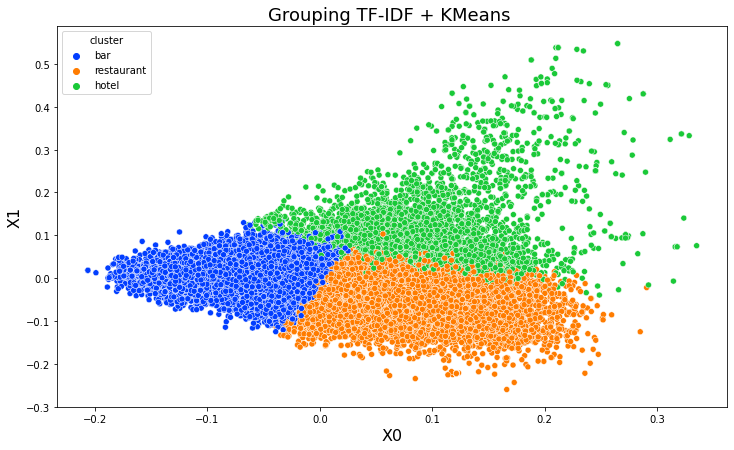

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 7))
plt.title("Grouping TF-IDF + KMeans ", fontdict={"fontsize": 18})
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
sns.scatterplot(data=df_hospitality, x='x0', y='x1', hue='cluster', palette="bright")
plt.savefig('hospitality_clustering.png')

plt.show()

#df_fit_sport


In [74]:
df_fit_sport['SUB-CATEGORY'].unique()

array(['gym', 'public pool', 'paddleboard rental', 'swimming school'],
      dtype=object)

In [75]:
df_fit_sport['SUB-CATEGORY']=df_fit_sport['SUB-CATEGORY'].replace(['bootcamp classes','boutique wellness studio'], 'gym')

In [76]:
df_fit_sport=df_fit_sport.append(df_sport_recreation)

In [77]:
df_fit_sport['SUB-CATEGORY'].unique()

array(['gym', 'public pool', 'paddleboard rental', 'swimming school'],
      dtype=object)

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X = vectorizer.fit_transform(df_fit_sport['caption'])

In [79]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_

In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(X.toarray())
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [81]:
df_fit_sport['cluster'] = clusters
df_fit_sport['x0'] = x0
df_fit_sport['x1'] = x1

cluster_map_fit = {0:'gym', 1:'swimming school', 2:'paddleboard rental', 3:'public pool'} 
df_fit_sport['cluster'] = df_fit_sport['cluster'].map(cluster_map_fit);

In [82]:
get_top_keywords(10, df_fit_sport)


Cluster 0
theyogabar,our,noegotraining,in,for,we,and,to,you,the

Cluster 1
for,you,swim,pool,our,and,the,we,to,swimming

Cluster 2
supgb,paddleboard,riverthames,nature,supuk,paddling,thames,paddle,outdoors,sup

Cluster 3
ladiesfitness,onlineexercise,exerciseathome,exerciseclass,motherhoodgoals,virtualworkout,virtualexercise,virtualbootcamp,mumslife,mumgoals


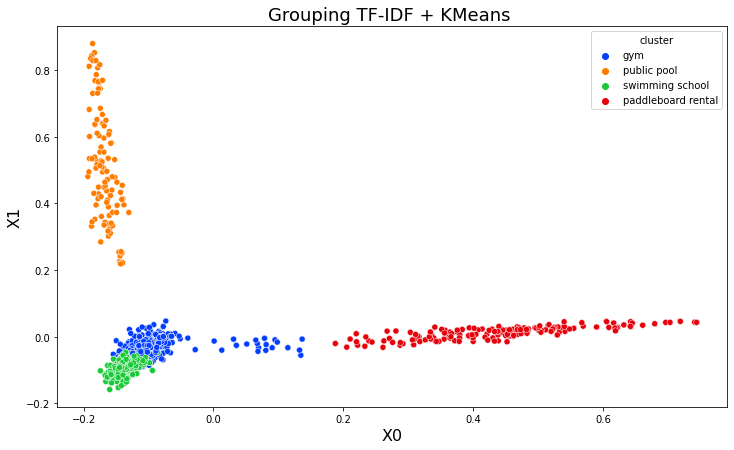

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 7))
plt.title("Grouping TF-IDF + KMeans ", fontdict={"fontsize": 18})
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
sns.scatterplot(data=df_fit_sport, x='x0', y='x1', hue='cluster', palette="bright")
plt.savefig('fitness_clustering.png')

plt.show()

#df_retail


In [55]:
df_retail['SUB-CATEGORY'].unique()

array(['deli shop', 'florist', 'dessert shop',
       'wine, beer & spirits shop', 'doughnut shop', 'bakery',
       'streetfood market', 'pastry shop', 'chocolate shop',
       'wine bar & shop', 'coffee / food shop', 'ice cream shop',
       'empanadas store / delivery', 'food delivery'], dtype=object)

In [56]:
df_retail['SUB-CATEGORY']=df_retail['SUB-CATEGORY'].replace(['dessert shop', 'deli shop', 'bakery', 'pastry shop', 'ice cream shop', 'chocolate shop', 'doughnut shop'], 'dessert shop')
df_retail['SUB-CATEGORY']=df_retail['SUB-CATEGORY'].replace(['wine, beer & spirits shop', 'wine bar & shop'], 'spirits shop')
df_retail['SUB-CATEGORY']=df_retail['SUB-CATEGORY'].replace(['streetfood market', 'coffee / food shop', 'poke shop'], 'food shop')
df_retail['SUB-CATEGORY']=df_retail['SUB-CATEGORY'].replace(['empanadas store / delivery', 'food delivery'], 'delivery')



In [57]:
df_retail['SUB-CATEGORY'].unique()

array(['dessert shop', 'florist', 'spirits shop', 'food shop', 'delivery'],
      dtype=object)

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X = vectorizer.fit_transform(df_retail['caption'])

In [60]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_

In [61]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(X.toarray())
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [62]:
df_retail['cluster'] = clusters
df_retail['x0'] = x0
df_retail['x1'] = x1

cluster_map_retail = {0:'dessert shop', 1:'florist', 2:'spirits shop',
       3:'fishmongers / butchers', 4:'food shop', 5:'delivery'} 
df_retail['cluster'] = df_retail['cluster'].map(cluster_map_retail);

In [63]:
get_top_keywords(10, df_retail)


Cluster 0
in,cake,today,for,of,chocolate,our,with,the,and

Cluster 1
it,in,our,for,of,and,you,the,we,to

Cluster 2
tap,shop,for,the,bio,link,in,our,order,to

Cluster 3
fedined,spoonedin,fedinburgh,tastybunsbakery,edinburgh,cuckoosbakery,cuckoo,edinburghfood,edinfoodclub,edineats

Cluster 4
bakery,bunsfromhome,nottinghill,london,and,foodie,croissant,fika,morning,buns

Cluster 5
factory,fact,facing,faces,facebook,face,fabulously,fairtradecoffee,éclair,nan


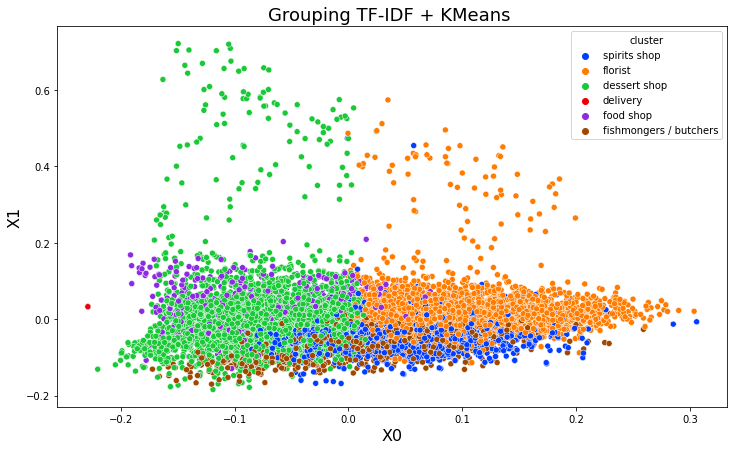

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 7))
plt.title("Grouping TF-IDF + KMeans ", fontdict={"fontsize": 18})
plt.xlabel("X0", fontdict={"fontsize": 16})

plt.ylabel("X1", fontdict={"fontsize": 16})
sns.scatterplot(data=df_retail, x='x0', y='x1', hue='cluster', palette="bright")
plt.savefig('retail_clustering.png')

plt.show()

#df_childcare


In [68]:
df_childcare['SUB-CATEGORY'].unique()

array(['nursery', 'preparatory school'], dtype=object)

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X = vectorizer.fit_transform(df_childcare['caption'])

In [66]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(X.toarray())
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [69]:
df_childcare['cluster'] = clusters
df_childcare['x0'] = x0
df_childcare['x1'] = x1

cluster_map_childcare = {0: "nursery", 1: "preparatory school"} 
df_childcare['cluster'] = df_childcare['cluster'].map(cluster_map_childcare);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [72]:
get_top_keywords(20, df_childcare)


Cluster 0
done,recently,for,week,well,we,of,at,this,been,had,they,who,have,their,year,to,and,in,the

Cluster 1
khslife,is,are,you,in,at,education,richmonduponthames,of,kingshousesch,and,school,for,we,kingshouseschool,nursery,richmond,to,the,our


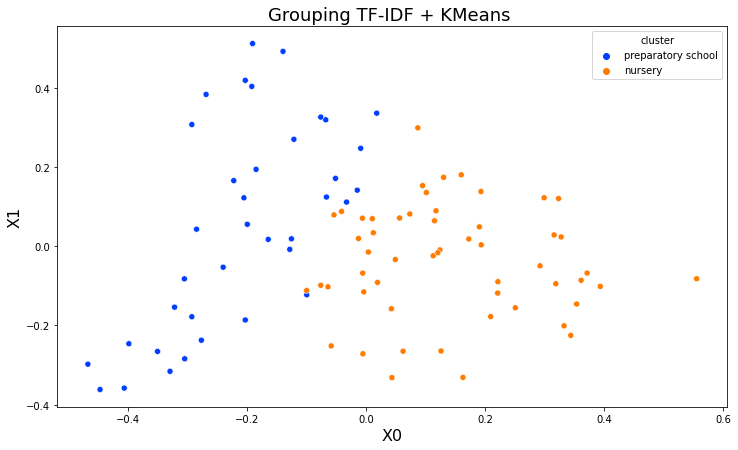

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 7))
plt.title("Grouping TF-IDF + KMeans ", fontdict={"fontsize": 18})
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
sns.scatterplot(data=df_childcare, x='x0', y='x1', hue='cluster', palette="bright")
plt.savefig('childcare_clustering.png')
plt.show()